In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras 

import tensorflow as tf


In [2]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [3]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (60000, 28, 28)
Testing set shape:  (10000, 28, 28)


In [4]:
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


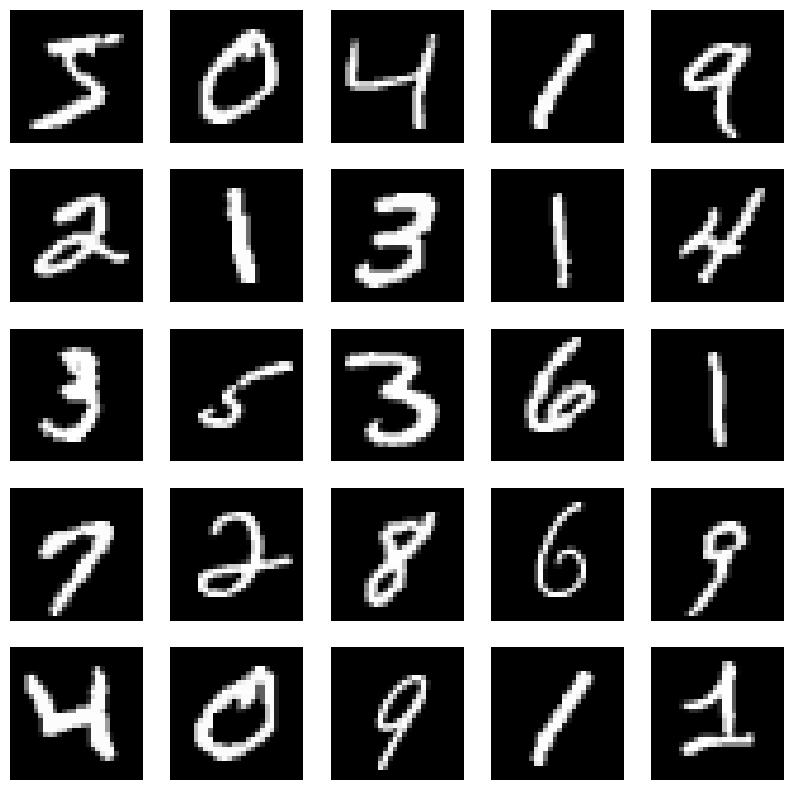

In [5]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap= 'gray')
    plt.axis('off')
plt.show()

In [6]:
unique, counts= np.unique(y_train, return_counts = True)
class_dist= dict(zip(unique,counts))
print("Class Distribution:\n", class_dist)

Class Distribution:
 {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


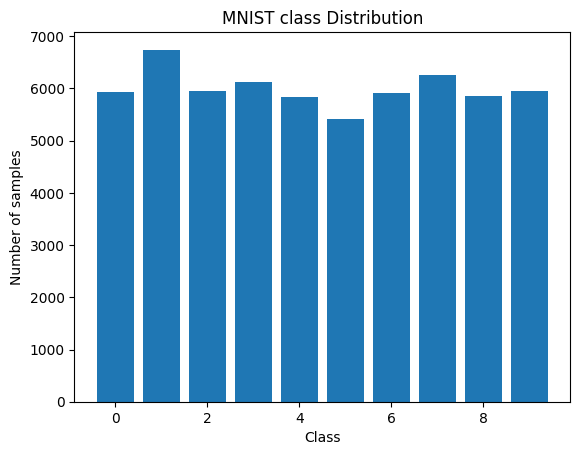

In [7]:
plt.bar(class_dist.keys(), class_dist.values())
plt.title("MNIST class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()


In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
from keras.utils import to_categorical
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [10]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
# X_train= X_train.reshape((60000, 28*28))
# X_train= X_train.astype('float32')/255
# X_test= X_test.reshape((10000, 28*28))
# X_test= X_test.astype('float32')/255

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [12]:

X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [13]:
# Reshape your data to flatten the images
# X_train = X_train.reshape((X_train.shape[0], -1))
# X_val = X_val.reshape((X_val.shape[0], -1))


In [14]:
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras import regularizers

# tf.random.set_seed(42)
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(28*28,), kernel_regularizer=regularizers.l2()))

# # model.add(Dense(512, activation= 'relu', input_shape= (28*28 , ), kernel_regularizers= regularizers.l2()))
# model.add(Dense(10, activation= 'softmax'))
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import regularizers


# Set the random seed for TensorFlow
tf.random.set_seed(42)


# Define the MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28, ), kernel_regularizer=regularizers.l2()))
model.add(Dense(10, activation='softmax'))

In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:

history = model.fit(X_train, y_train, epochs=20, batch_size=60, validation_data=(X_val, y_val))

Epoch 1/20
834/834 [==============================] - 12s 13ms/step - loss: 0.8205 - accuracy: 0.8966 - val_loss: 0.4445 - val_accuracy: 0.9245
Epoch 2/20
834/834 [==============================] - 9s 11ms/step - loss: 0.4321 - accuracy: 0.9265 - val_loss: 0.3865 - val_accuracy: 0.9378
Epoch 3/20
834/834 [==============================] - 10s 12ms/step - loss: 0.3996 - accuracy: 0.9315 - val_loss: 0.3675 - val_accuracy: 0.9447
Epoch 4/20
834/834 [==============================] - 10s 12ms/step - loss: 0.3724 - accuracy: 0.9393 - val_loss: 0.3752 - val_accuracy: 0.9351
Epoch 5/20
834/834 [==============================] - 11s 13ms/step - loss: 0.3516 - accuracy: 0.9417 - val_loss: 0.3363 - val_accuracy: 0.9497
Epoch 6/20
834/834 [==============================] - 11s 13ms/step - loss: 0.3325 - accuracy: 0.9472 - val_loss: 0.2942 - val_accuracy: 0.9602
Epoch 7/20
834/834 [==============================] - 10s 12ms/step - loss: 0.3182 - accuracy: 0.9493 - val_loss: 0.3023 - val_accuracy: 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


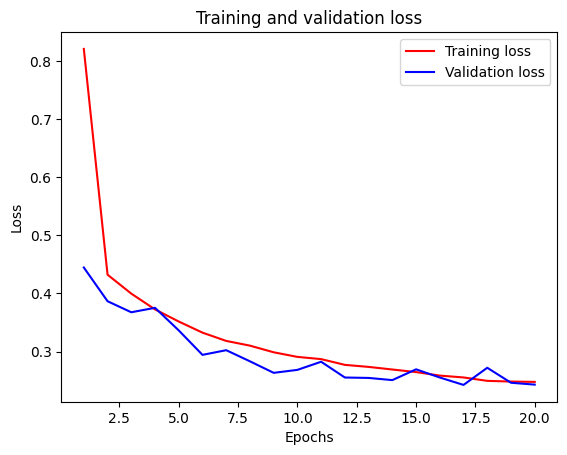

In [18]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print("test accuracy:", np.round(test_acc, decimals=3))

313/313 [==============================] - 1s 4ms/step - loss: 0.2422 - accuracy: 0.9652
test accuracy: 0.965


313/313 [==============================] - 1s 4ms/step


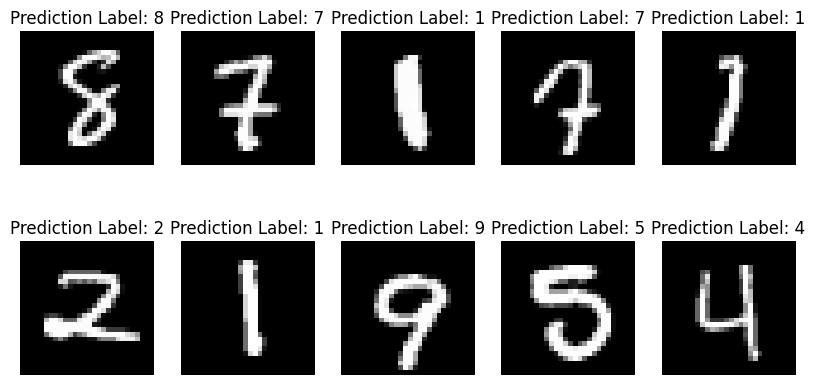

In [20]:
y_pred= model.predict(X_test)
y_pred_int= np.argmax(y_pred, axis= 1)
num_images= 10
np.random.seed(0)
random_indices= np.random.choice(X_test.shape[0], num_images, replace= False)
fig, axs= plt.subplots(2,5, figsize= (10,5))
for i, index in enumerate(random_indices):
    row= i//5
    col= i%5
    axs[row, col].imshow(X_test[index].reshape(28,28),cmap='gray')
    axs[row,col].set_title("Prediction Label: %d" %y_pred_int[index])
    axs[row, col].axis('off')
plt.show()